# 四字母分析法
### 四字母分析法是一种$\color{red}{唯密文、自动化、通用}$的破译方法
### 基本原理是通过$\color{red}{局部密钥的变动}$，使得解密的明文更像“自然语言”，越像“自然语言”，密钥正确的可能性越大
### 什么样的明文更像“自然语言”?
事先统计四字母组合出现的频率：统计托尔斯泰的著作《战争与和平》中四元组的出现概率，去除书中的所有空格和标点符号后，总计约有2,500,000个四元组，经进一步分类整理，可以得到各个四元组的出现次数和概率对数
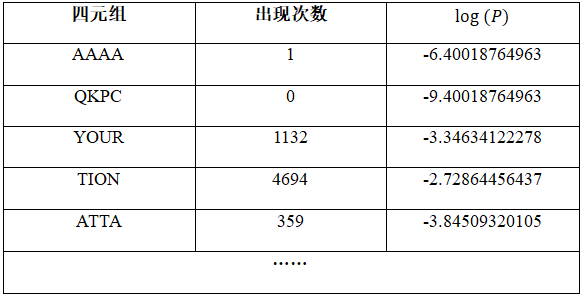


In [72]:
RDF(log(1/2500000,10)),RDF(log(1132/2500000,10)),10^(-9.40018764963)

(-6.397940008672037, -3.3440935818197848, 3.97935193865963e-10)

#### “自然语言”中出现频率高的四字母组合，贡献的log(P)更大。
自然想到将明文拆分成四字母组合，计算log(P)的和，我们称为$\color{red}{计分score}$,在同样长度的明文情形下，score越大，明文越接近“自然语言”
## 例如：
### ATTACK=ATTA+TTAC+TACK
### score(ATTACK)=log(P(ATTA))+log(P(TTAC))+log(P(TACK))
### 例（1）以下为一般代换密码的破译示例：

In [ ]:
import random
from ngram_score import ngram_score
#参数初始化
ciphertext ='UNGLCKVVPGTLVDKBPNEWNLMGVMTTLTAZXKIMJMBBANTLCMOMVTNAAMILVTMCGTHMKQTLBMVCMXPIAMTLBMVGLTCKAUILEDMGPVLDHGOMIZWNLMGBZLGKSMAZBMKOMKTWNLMGBZKTLCKAMHMIMDMVGBZLXBLCSAZTBMMOMTVPGMOMVKJLTQPXCBPNEJLBBLUILVDKJKZ'
parentkey = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
#只是用来声明key是个字典
key = {'A':'A'}
#读取quadgram statistics
fitness = ngram_score('english_quadgrams.txt')
parentscore = -99e9
maxscore = -99e9

print('---------------------------start---------------------------')
j=0
while 1:
    j=j+1
    #随机打乱key中的元素
    random.shuffle(parentkey)
    #将密钥做成字典
    #密文:明文
    for i in range(len(parentkey)):
        key[parentkey[i]] = chr(ord('A')+i)
    #用字典一一映射解密
    decipher = ciphertext
    for i in range(len(decipher)):
        decipher = decipher[:i]+key[decipher[i]]+decipher[i+1:]
    parentscore = fitness.score(decipher)#计算适应度
    #在当前密钥下随机交换两个密钥的元素从而寻找是否有更优的解
    count = 0
    while count < 2000:
        a = random.randint(0,25)
        b = random.randint(0,25)
        #随机交换父密钥中的两个元素生成子密钥，并用其进行解密
        parentkey[a],parentkey[b]= parentkey[b],parentkey[a]
        key[parentkey[a]],key[parentkey[b]] = key[parentkey[b]],key[parentkey[a]]
        decipher = ciphertext
        for i in range(len(decipher)):
            decipher = decipher[:i]+key[decipher[i]]+decipher[i+1:]
        score = fitness.score(decipher)
        #此子密钥代替其对应的父密钥，提高明文适应度
        if score > parentscore:
            parentscore = score
            count=0
        else:
            #还原
            parentkey[a],parentkey[b]=parentkey[b],parentkey[a]
            key[parentkey[a]],key[parentkey[b]]=key[parentkey[b]],key[parentkey[a]]
            count +=1
    #输出该key和明文
    if parentscore > maxscore:
        maxscore = parentscore
        print ('Currrent key: '+''.join(parentkey))
        print ('Iteration total:', j)
        decipher = ciphertext
        for i in range(len(decipher)):
            decipher = decipher[:i]+key[decipher[i]]+decipher[i+1:]
        print ('Plaintext: ', decipher.lower(),maxscore)
        # sys.stdout.flush()


---------------------------start---------------------------
Currrent key: KJAGMEDZLSQCXVNWFITBUOHYPR
Iteration total: 1
Plaintext:  uodilannydsingatyofpoiednessischmarebettcosilevensoccerinseldsweaksitenlemyrcesitendislacurifgedynigwdverhpoiedthidajechteaveaspoiedthasilaceweregendthimtiljchsteevesnydevenabiskymltyofbittiuringabah -1000.6746628331897
Currrent key: KUCEMXDHLYSBAVPQWITGNOJRZF
Iteration total: 8
Plaintext:  buticannotsingaloudquietnessismyfarewellmusicevensummerinsectsheapsilenceformesilentiscambridgetonightveryquietlyitakemyleaveasquietlyasicameheregentlyiflickmysleevesnotevenawispofcloudwillibringaway -900.592419222168


### 例（2）以下为维吉尼亚密码的破译示例：

In [ ]:
import random
from ngram_score import ngram_score
#参数初始化
ciphertext ='YRAAHYHBIUWGRWBYCHCMHKXKUVRQNFSPWULNRMPQYHBMQDWKLNMBJCKUOEJENVLDYLPWCLDAYOUFQOXFAFVLCRMPVZQQQMNSDLCIPWPCHDLYJWKLPKMZQRQQMTAAVDMLYJQVWYVCOHRUDMUEZCWOPJPVVJSVJEZFYOCMQWWLRETAHFDNHYZSRGVMLAHFWRIJKJVLRSNAWKZSPJXSKHXXFKIJDXHWAOIV'
#读取quadgram statistics
fitness = ngram_score('english_quadgrams.txt')
def sub(c,m):
    return chr((ord(c)-ord('A')-m)%26+ord('A'))
maxscore = -99e9
for k in range (1,8):
    print('---------------------------start---------------------------')
    print('assume key length=%d'%k);sys.stdout.flush()
    parentscore = -99e9
    key=list(range(k))
    j=0
    while j<10*k:
        pos=randint(0,k-1)
        j+=1
        for item in range(26):
            temp=key[pos]
            key[pos]=item
            decipher = ciphertext
            for i in range(len(decipher)):
                decipher = decipher[:i]+sub(decipher[i],key[i%k])+decipher[i+1:]
            score = fitness.score(decipher)
            #此子密钥代替其对应的父密钥，提高明文适应度
            if score > parentscore:
                parentscore = score
            else:
                #还原
                key[pos]=temp
    #输出该key和明文
    if parentscore > maxscore:
        maxscore = parentscore
        print ('Currrent key: ',key)
        print ('Iteration total:', j)
        decipher = ciphertext
        for i in range(len(decipher)):
            decipher = decipher[:i]+sub(decipher[i],key[i%k])+decipher[i+1:]
        print ('Plaintext: ', decipher.lower(),maxscore)
        sys.stdout.flush()

### 例（3）以下为3阶Hill密码的破译示例：

In [ ]:
import random
from ngram_score import ngram_score
#参数初始化
ciphertext0 ='RYLLAFFSOJJEYVSBYWGDEEKCKUISULIEFVXVZKHBXMVPHMIBQJZSEIXTMNUUIOHPGVFFVYTSUNUWSGLJTVPMXSGWMDJJEZRZIEEBHLTJFDFFXVJOCOJGNQJZVOUGMXHEQBCTVWZBHLGGSTRCSKUGDEIJMWYGJWCFSVVWZJALXZRSVYHAFTDDYJUXNCNBUBZXFFVYTSTGATRPTMWHQCCAMTIZPEMPDZDWRZRZIEEBHLKPINJRSLUTBTSYINEKOJAFOERKILRENTCTFZWHIBDJWSRDOPFYVHFREQYOJAVUCXGLHAIXMIAQZVEOCBTDSAJRWYQIBPZFDQKZGTAOQGXAJCLLIVUZOHMJMYNOHBWGIEFJHIPEMPBGNTCBZXFFVYTSCOWYPPPEMLYYLJKMOMIEFQSNKSHVOHKNRXVJNBUBZXWQEBATQBTVXQCBYPGYHHTTKEXYKJGOSYIKPIPDHZRZIEETMTOAOQQXBSTXCJLUETMTOAOQQXWSRMSRJFWEQWZKHWZFNPVFPFWSSECRDFLETYSWXFIWVUZAGZGBYTTSHIAHFREQYXCJLUEBHLLLYBSWNXFMKUEQLZZUQIWSIHNDOPPEBRYMBGIEFCTKIGBBTOXNFWWBPDHXUAQYPHNVWSSRWWBHZJCGSUYHWMLZJPGYLCJMMBBZDVPHKDCLIQUPXWRWNXIHIAHUCNYMBSHIEFDTZTAOZJLJLZRHHXKOXGLHAIGOTNBHVXQMDWBPZUTGZMMXKWJGSHTWRGRBYARYLBXMJLZZQWHFXDITLRVWDGJTWMHWBVTWSGVSBZJLJLZVPHMPSBYEJLZXKOXGLHAIAUDIEFRKINTCCUEFGPCXSTAOVVLFSOMPSBZXQANLVIEGMTFBFSOSWXFIWPSKKAMTVZWGOHHEZESJGNYERWSRLCJGWYVPHJGSHTWRGRCRAXNCNISJVMJFKWESQDOGRABTXLAAXTMBZXCJYHIADWPWSXXYXJDIXNCNTCZOJXKOTWIDBVGOPWSRLJTYJGZTICXSWSRUPXMLOTMWNWWQGLFIHVBZNLIHFRURQWPEHFKVHZMWRBOKIZWSZLNGCTKKEOTZJYVJUDFFKVWHTLTHENMCTRIVKIKNPNMCTRIAPQNLIPDHXTFUTGQANLVIIWMKNP'
#定义mod26运算的代数结构
R = Zmod(26)
#定义mod26的3*3矩阵类型
MR = MatrixSpace(R,3,3)
key=MR()
ciphertext=ciphertext0[:240]
#读取quadgram statistics
fitness = ngram_score('english_quadgrams.txt')
vcode=[0]*(len(ciphertext0)//3)
dic={}
#密文转化为3维向量的数组，每一个vcode[i]是一个三维向量
for i in range(len(ciphertext0)//3):
    vcode[i]=vector([R(ord(ciphertext0[3*i])-ord('A')),R(ord(ciphertext0[3*i+1])-ord('A')),R(ord(ciphertext0[3*i+2])-ord('A'))])

#缓存整数和字符之间的对应关系
for i in range(26):
    dic[R(i)]=chr(ord('A')+i)

#利用3*3的解密密钥key解密
def hill(ciphertext):
    cipher=''
    for i in range(len(ciphertext)//3):
        v = vcode[i]*key
        cipher = cipher+dic[v[0]]+dic[v[1]]+dic[v[2]]
    return cipher

maxscore = -99e9
key=MR()

for k in range (15):
    print('---------------------------new start %d---------------------------'%k)
    sys.stdout.flush()
    parentscore = -99e9
    pos=k%3
    if pos==0:
        for i in range(3):
            for j in range(3):
                key[i,j]=R(randint(0,25))
    for item1 in range(26):
        for item2 in range(26):
            for item3 in range(26):
                if gcd([item1,item2,item3,26])!=1:
                    continue
                temp1,temp2,temp3=key[0,pos],key[1,pos],key[2,pos]
                key[0,pos],key[1,pos],key[2,pos]=R(item1),R(item2),R(item3)
                #key=MR([[6,23,22],[18,8,17],[11,5,4]])
                decipher = hill(ciphertext)
                score = fitness.score(decipher)
                #此子密钥代替其对应的父密钥，提高明文适应度
                if score > parentscore:
                    parentscore = score
                else:
                    #还原
                    key[0,pos],key[1,pos],key[2,pos]=temp1,temp2,temp3
    #调整可能列的顺序
    st=[[(0,1)],[(1,2)],[(0,2)],[(0,1),(0,2)],[(0,2),(0,1)]]
    if pos==2:
        for s in st:
            for t in s:
                key.swap_columns(t[0],t[1])
            decipher=hill(ciphertext)
            score = fitness.score(decipher)
            if score > parentscore:
                parentscore = score
            else:
                for t in s[::-1]:
                    key.swap_columns(t[0],t[1])
    if parentscore > maxscore:
        maxscore = parentscore
        print ('Currrent key^-1: ') # K=MR([[6,23,22],[18,8,17],[11,5,4]])
        print(key)
        decipher = hill(ciphertext0)
        print ('Plaintext: ', decipher.lower(),maxscore)
        sys.stdout.flush()